Import all nessesary libarys

In [34]:
import numpy as np
#import cupy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline

Definitions of all interchangeable variables of the script

In [35]:
# Definitions

# Matrix size

matrix_width = 50
matrix_height = 50

# Grayscale value range

gray_value_min = 0
gray_value_max = 2

# values --> used for würfeln.. has to be merged with grayscale_value_range

values = [-1,1]

# dampening factor

beta = 1

#itterations

itteration = 1

# definition Mask

mask = np.array([
        [-0.81,0,0,0,-0.81],
        [0,0.91,0.4,0.91,0],
        [0,0.4,0,0.4,0],
        [0,0.91,0.4,0.91,0],
        [-0.81,0,0,0,-0.81]
       ])

time_slice_external = 0
time_slice_internal = 0
time_probability = 0
time_dice = 0

In [36]:
def calc_slice_shape(mask):
    mask_shape = [(mask.shape[0]-1)//2, (mask.shape[0]+1)//2, (mask.shape[1]-1)//2, (mask.shape[1]+1)//2]
    return (mask_shape)

applys the mask to the selected data point of the matrix

In [37]:
def apply_mask(height,width, matrix, mask, mask_shape):
    # create a copy of the matrix in the area of the mask

    start = time.time()
    matrix_slice = matrix.take(range(height - mask_shape[0], height + mask_shape[1]),mode='wrap', axis=0).take(range(width - mask_shape[2], width + mask_shape[3]),mode='wrap',axis=1)
    ende = time.time()
    time_slice_external += ende - start
    print('time_slice_external: {:5.10f}s'.format(time_slice_external))
    print('time_slice_external_: {:5.10f}s'.format(ende - start))
    
    start = time.time()
    matrix_slice2 = matrix.take(range((height - (mask.shape[0]-1)//2),(height + (mask.shape[0]+1)//2)),mode='wrap', axis=0).take(range((width - (mask.shape[1]-1)//2),(width + (mask.shape[1]+1)//2)),mode='wrap',axis=1)
    ende = time.time()
    time_slice_internal =+ ende - start
    start = time.time()
    # calculate the probability of a data point to flip
    probability = 1 / (1 + np.exp(-beta * 2 * np.sum(mask * np.absolute(matrix[height][width] - matrix_slice))))
    ende = time.time()
    time_probability =+ ende - start   
    start = time.time()
    #use np.random.choice instead
    if binom.rvs(1,p=probability): 
        matrix[height][width] = -matrix[height][width]
    ende = time.time()
    time_dice =+ ende - start
    return matrix
    

generate Matrix of white noise

CPU times: user 25.7 ms, sys: 2.77 ms, total: 28.4 ms
Wall time: 26.7 ms


array([[ 1, -1, -1, ..., -1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1,  1, -1],
       ...,
       [ 1, -1, -1, ..., -1, -1,  1],
       [ 1,  1,  1, ...,  1, -1, -1],
       [-1,  1, -1, ..., -1,  1, -1]])

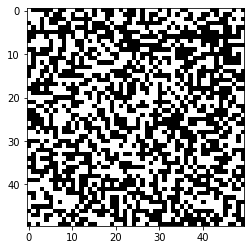

In [38]:
%%time
# generate Matrix of white noise
matrix = np.random.randint(gray_value_min,gray_value_max,size=(matrix_height,matrix_width))
# replaces 0 in the matrix with -1s (nessesary for a few masks)
matrix = np.where(matrix == 0, -1, matrix)
# Print matrix as Image
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)
# Return (and print) matrix
matrix

apply mask to whole matrix

In [39]:
%%time
# itterate thrue the whole matrix and appy mask
counter = 0
mask_shape = calc_slice_shape (mask)
while counter < itteration:
    counter += 1
    for h in range(0, matrix.shape[0]):
        for w in range(0, matrix.shape[1]):
            matrix = apply_mask(h,w,matrix,mask,mask_shape) #faster with inplace ?
print('time_slice_external: {:5.10f}s'.format(time_slice_external))
print('time_slice_internal: {:5.10f}s'.format(time_slice_internal))
print('time_probability: {:5.10f}s'.format(time_probability))
print('time_dice: {:5.10f}s'.format(time_dice))

UnboundLocalError: local variable 'time_slice_external' referenced before assignment

plot new matrix

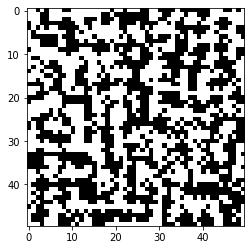

In [25]:
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)

safe new matrix to file

In [ ]:
np.save("matrix", matrix)

Fragen für Mittwoch:
Formel (was liegt mit in der summe? O.o)
        e^-2 abhängigkeit zu anz graustufen
        mehrere pixel zeitgleich angucken (maske gerade anzahl (8x8 oder so mit 4 mittleren pixeln)
        exponenten ersetzen.. wie genau soll ich das umsetzen? O.o
        und wo genau brauch ich fakultäten